# `Assignment 2`

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
fname_2290 = r'/Users/Raphael/Documents/GitHub_repositories/Hydrology-group-8/hydrology-group-8/Assignment_2/Assignment_2_data/produkt_pkt_aero_20210101_20211229_02290.txt'
fname_4466 = r'/Users/Raphael/Documents/GitHub_repositories/Hydrology-group-8/hydrology-group-8/Assignment_2/Assignment_2_data/produkt_pkt_aero_20210101_20211231_04466.txt'

data_2290 = pd.read_csv(fname_2290,delimiter = ';')
data_4466 = pd.read_csv(fname_4466,delimiter = ';')

data_2290 = data_2290.replace(-999,np.nan)
data_4466 = data_4466.replace(-999,np.nan)

In [12]:
date = 2021010406
day_data_2290 = data_2290.loc[data_2290['MESS_DATUM'] == date]
date = 2021010400
day_data_4466 = data_4466.loc[data_4466['MESS_DATUM'] == date]

NameError: name 'N' is not defined

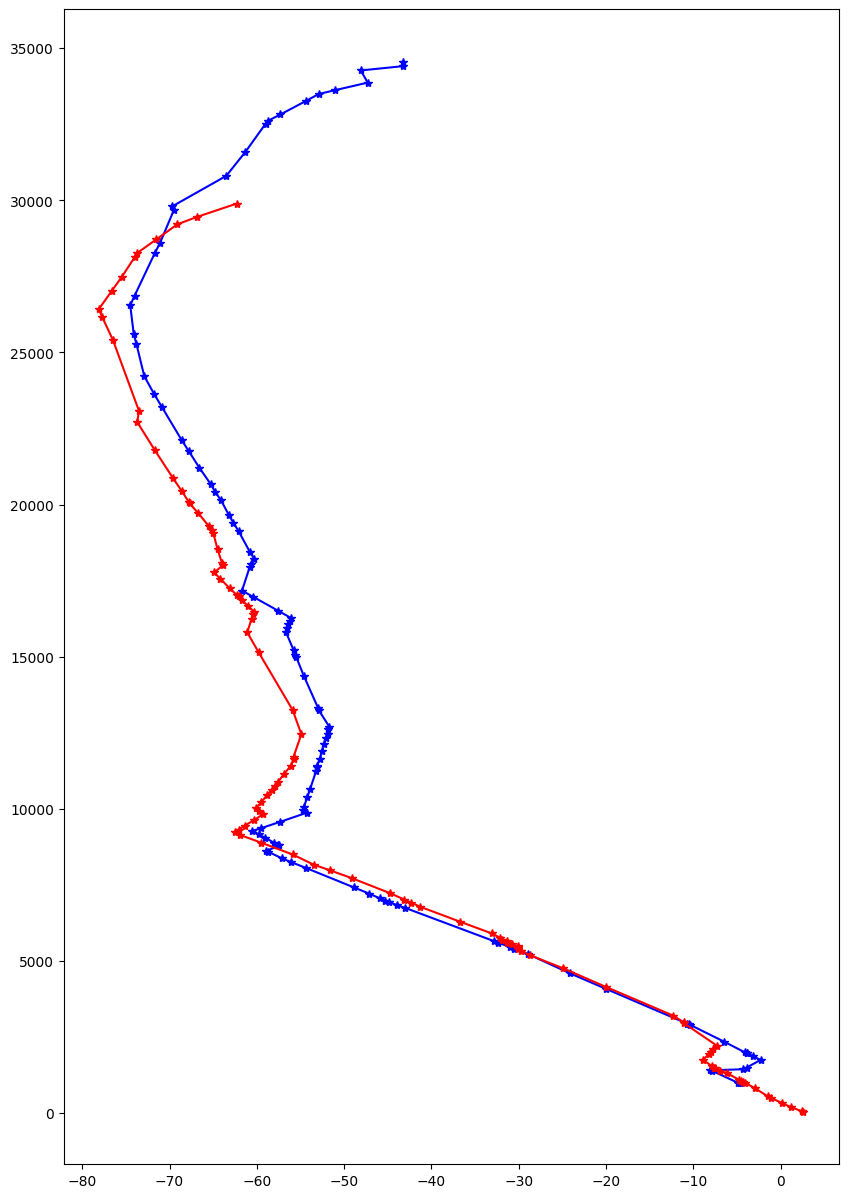

In [19]:
plt.figure(figsize=(10,15))
plt.plot(day_data_2290['AET'],day_data_2290['AEH'],'b-*')
plt.plot(day_data_4466['AET'],day_data_4466['AEH'],'r-*')
plt.xlabel('Air temperature in degrees C')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. Air temperature')
plt.grid('Below')


In [ ]:
plt.figure(figsize=(10,15))
plt.plot(day_data_2290['AET'],day_data_2290['AEH'],'b-*')
plt.plot(day_data_4466['AET'],day_data_4466['AEH'],'r-*')
plt.xlabel('Air temperature in degrees C')
plt.ylabel('Geopotential elevation, mamsl')
plt.legend(['Hohenpeissenberg','Schleswig'])
plt.title('Geopotential elevation vs. Air temperature')
plt.grid('Below')

# Geopotential elevation v. Air temperature
